In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=515208fde4c626810f76cdbdb2086f59d1d04c915efdf3d8940d9aa9c091dc95
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re

In [ ]:
def load_data():
    data_tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweet.csv')
    return data_tweets

tweets = load_data()
tweets

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1790588009207022021,Wed May 15 04:03:57 +0000 2024,101,@ABjodohComeback Mungkin Bea Cukai itu baru sl...,1790593941680865724,NaN,ABjodohComeback,in,Serang Banten,0,18,15,https://x.com/DadangSodikin1/status/1790593941...,287581772,DadangSodikin1
1,1790588009207022021,Wed May 15 05:24:54 +0000 2024,49,@ABjodohComeback Bandara dan pelabuhan gimana ...,1790614309590221165,NaN,ABjodohComeback,in,"Tebet, Indonesia",0,5,7,https://x.com/sumpanto/status/1790614309590221165,1605195051084435457,sumpanto
2,1790588009207022021,Wed May 15 05:08:36 +0000 2024,63,@ABjodohComeback Aslinya sdh lama berjalan han...,1790610210425598394,NaN,ABjodohComeback,in,Jawi Wetan,0,3,1,https://x.com/C4k_D3pp/status/1790610210425598394,3797534720,C4k_D3pp
3,1790588009207022021,Wed May 15 05:50:12 +0000 2024,9,@ABjodohComeback sejak dulu saatnya terkuak se...,1790620679064486138,NaN,ABjodohComeback,in,NaN,0,2,1,https://x.com/bebek7415975944/status/179062067...,1716429241955627008,bebek7415975944
4,1790588009207022021,Wed May 15 11:47:20 +0000 2024,0,@ABjodohComeback Emosi kalo dengar berita cukai,1790710551833968777,NaN,ABjodohComeback,in,"DKI Jakarta, Indonesia",0,0,0,https://x.com/Bimoca2/status/1790710551833968777,1398603050764279809,Bimoca2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7086,1782945647462879427,Wed Apr 24 01:44:43 +0000 2024,0,Kemendagnya terlihat ngga begitu peduli kritik...,1782948754418704766,NaN,catsandkatzen,in,"Jakarta Capital Region, Indone",0,1,0,https://x.com/catsandkatzen/status/17829487544...,40649595,catsandkatzen
7087,1666637762014121984,Thu Jun 08 02:46:22 +0000 2023,0,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,1666637766606884865,NaN,beacukaiRI,in,Indonesia,0,1,0,https://x.com/beacukaiRI/status/16666377666068...,2940183750,beacukaiRI
7088,1789192023209316461,Sat May 11 14:53:02 +0000 2024,0,@prastow Terlalu banyak Omong Mas .. Pa Harto ...,1789307736997679503,NaN,prastow,in,Jakarta Capital Region,0,1,0,https://x.com/yono_1977/status/178930773699767...,2148483312,yono_1977
7089,1640949185481678849,Wed Mar 29 05:29:07 +0000 2023,1,Mantan Kepala PPATK Yunus Husein mengatakan te...,1640949185481678849,NaN,NaN,in,Jakarta,0,0,0,https://x.com/kompascom/status/164094918548167...,23343960,kompascom


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7091 entries, 0 to 7090
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      7091 non-null   int64 
 1   created_at               7091 non-null   object
 2   favorite_count           7091 non-null   int64 
 3   full_text                7091 non-null   object
 4   id_str                   7091 non-null   object
 5   image_url                964 non-null    object
 6   in_reply_to_screen_name  5392 non-null   object
 7   lang                     7091 non-null   object
 8   location                 4237 non-null   object
 9   quote_count              7091 non-null   int64 
 10  reply_count              7091 non-null   int64 
 11  retweet_count            7091 non-null   int64 
 12  tweet_url                7091 non-null   object
 13  user_id_str              7091 non-null   object
 14  username                 7091 non-null  

In [ ]:
tweets = pd.DataFrame(tweets[['full_text']])
tweets

,full_text
0,@ABjodohComeback Mungkin Bea Cukai itu baru sl...
1,@ABjodohComeback Bandara dan pelabuhan gimana ...
2,@ABjodohComeback Aslinya sdh lama berjalan han...
3,@ABjodohComeback sejak dulu saatnya terkuak se...
4,@ABjodohComeback Emosi kalo dengar berita cukai
...,...
7086,Kemendagnya terlihat ngga begitu peduli kritik...
7087,Tujuan dari kegiatan CVC ini yaitu untuk lebi...
7088,@prastow Terlalu banyak Omong Mas .. Pa Harto ...
7089,Mantan Kepala PPATK Yunus Husein mengatakan te...


In [ ]:
#menghapus username dalam tweet
def remove_pattern(Text, pattern):
    r = re.findall(pattern, str(Text))
    for i in r:
        Text = re.sub(i, '', str(Text))
    return Text
tweets['remove_user'] = np.vectorize(remove_pattern)(tweets['full_text'], "@[\w]*")
tweets

,full_text,remove_user
0,@ABjodohComeback Mungkin Bea Cukai itu baru sl...,Mungkin Bea Cukai itu baru slh satu puncak gu...
1,@ABjodohComeback Bandara dan pelabuhan gimana ...,Bandara dan pelabuhan gimana mau aman.. Prema...
2,@ABjodohComeback Aslinya sdh lama berjalan han...,Aslinya sdh lama berjalan hanya sekarang tekn...
3,@ABjodohComeback sejak dulu saatnya terkuak se...,sejak dulu saatnya terkuak semoga kualat
4,@ABjodohComeback Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai
...,...,...
7086,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...
7087,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...
7088,@prastow Terlalu banyak Omong Mas .. Pa Harto ...,Terlalu banyak Omong Mas .. Pa Harto aja yg s...
7089,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...


In [ ]:
import re
import string
import nltk

def cleaning(Text):
    Text = re.sub(r'\$\w*', '', Text)         #digunakan untuk menghapus semua kata yang dimulai dengan tanda dolar ($) dan diikuti oleh karakter huruf, angka, atau garis bawah.      #
    Text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Text)     #untuk menghapus semua URL atau tautan web dari teks.
    Text = re.sub('&quot;'," ", Text)         #Digunakan untuk menggantikan setiap kemunculan `&quot;` dengan spasi kosong dalam kolom `text`.
    Text = re.sub(r"\d+", " ", str(Text))         #digunakan untuk menggantikan semua angka dalam teks yang disimpan dalam kolom `text` dengan spasi kosong.
    Text = re.sub(r"\b[a-zA-Z]\b", "", str(Text))     #digunakan untuk menghapus semua kata tunggal dalam teks yang disimpan dalam kolom `text`.
    Text = re.sub(r"[^\w\s]", " ", str(Text))         #digunakan untuk menggantikan semua karakter non-alphanumerik dan non-spasi dalam teks yang disimpan dalam variabel `content` dengan spasi kosong.
    Text = re.sub(r'(.)\1+', r'\1\1', Text)         #Digunakan untuk mengganti dua atau lebih karakter berulang dalam teks dengan hanya dua karakter yang berulang. Misalnya, jika terdapat karakter berulang "eeeee" dalam teks, maka akan digantikan dengan "ee".
    Text = re.sub(r"\s+", " ", str(Text))       #digunakan untuk menggantikan satu atau lebih spasi berturut-turut dalam teks
    Text = re.sub(r'#', '', Text)         #digunakan untuk menghapus semua tanda pagar (#) dalam teks
    Text = re.sub(r'[^a-zA-z0-9]', ' ', str(Text))    #Digunakan untuk menggantikan semua karakter non-alphanumerik dalam teks dengan spasi kosong, sehingga menghapus karakter-karakter tersebut dari teks dan mempertahankan hanya huruf (kapital dan kecil) serta angka.
    Text = re.sub(r'\b\w{1,2}\b', '', Text)     #digunakan untuk menghapus kata-kata dengan panjang satu atau dua karakter dalam teks
    Text = re.sub(r'\s\s+', ' ', Text)      #Digunakan untuk menggantikan dua atau lebih spasi berturut-turut dalam teks dengan satu spasi tunggal.
    Text = re.sub(r'^RT[\s]+', '', Text)        #menghapus RT
    Text = re.sub(r'^b[\s]+', '', Text)       #digunakan untuk menghapus spasi di awal teks
    Text = re.sub(r'^link[\s]+', '', Text)      #digunakan untuk menghapus string "link" yang diikuti oleh spasi di awal teks
    return Text

def remove_emoji(Text):
    emoji = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                        u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                        u"\U0001F1E0-\U0001F1FF"  # bendera negara
                        u"\U00002702-\U000027B0"  # simbol
                        u"\U000024C2-\U0001F251"  # emoji lainnya
                        "]+", flags=re.UNICODE)
    return emoji.sub(r'', Text)

def remove_URL(Text):
    url= re.compile(r'https?://\S+/www\.\S+')
    return url.sub(r' ', Text)

def remove_html(Text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', Text)

def remove_angka(Text):
    Text = re.sub('[0-9]+', '', Text)

    Text = re.sub(r'\$\w*', '', Text)

    Text = re.sub(r'^RT [\s]+', '', Text)

    Text = re.sub(r'#', '', Text)
    return Text


tweets['cleaning'] = tweets['remove_user'].apply(cleaning)

tweets


,full_text,remove_user,cleaning
0,@ABjodohComeback Mungkin Bea Cukai itu baru sl...,Mungkin Bea Cukai itu baru slh satu puncak gu...,Mungkin Bea Cukai itu baru slh satu puncak gu...
1,@ABjodohComeback Bandara dan pelabuhan gimana ...,Bandara dan pelabuhan gimana mau aman.. Prema...,Bandara dan pelabuhan gimana mau aman Preman ...
2,@ABjodohComeback Aslinya sdh lama berjalan han...,Aslinya sdh lama berjalan hanya sekarang tekn...,Aslinya sdh lama berjalan hanya sekarang tekn...
3,@ABjodohComeback sejak dulu saatnya terkuak se...,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat
4,@ABjodohComeback Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai
...,...,...,...
7086,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...
7087,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...
7088,@prastow Terlalu banyak Omong Mas .. Pa Harto ...,Terlalu banyak Omong Mas .. Pa Harto aja yg s...,Terlalu banyak Omong Mas Harto aja swmua oran...
7089,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...


In [ ]:
#case folding - ubah jadi huruf kecil
tweets['case_folding'] = tweets['cleaning'].str.lower()
tweets

,full_text,remove_user,cleaning,case_folding
0,@ABjodohComeback Mungkin Bea Cukai itu baru sl...,Mungkin Bea Cukai itu baru slh satu puncak gu...,Mungkin Bea Cukai itu baru slh satu puncak gu...,mungkin bea cukai itu baru slh satu puncak gu...
1,@ABjodohComeback Bandara dan pelabuhan gimana ...,Bandara dan pelabuhan gimana mau aman.. Prema...,Bandara dan pelabuhan gimana mau aman Preman ...,bandara dan pelabuhan gimana mau aman preman ...
2,@ABjodohComeback Aslinya sdh lama berjalan han...,Aslinya sdh lama berjalan hanya sekarang tekn...,Aslinya sdh lama berjalan hanya sekarang tekn...,aslinya sdh lama berjalan hanya sekarang tekn...
3,@ABjodohComeback sejak dulu saatnya terkuak se...,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat
4,@ABjodohComeback Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,emosi kalo dengar berita cukai
...,...,...,...,...
7086,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,kemendagnya terlihat ngga begitu peduli kritik...
7087,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,tujuan dari kegiatan cvc ini yaitu untuk lebi...
7088,@prastow Terlalu banyak Omong Mas .. Pa Harto ...,Terlalu banyak Omong Mas .. Pa Harto aja yg s...,Terlalu banyak Omong Mas Harto aja swmua oran...,terlalu banyak omong mas harto aja swmua oran...
7089,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,mantan kepala ppatk yunus husein mengatakan te...


In [ ]:
tweets['tokenisasi'] = tweets['case_folding'].apply(lambda x: x.lower().split())
tweets

,full_text,remove_user,cleaning,case_folding,tokenisasi
0,@ABjodohComeback Mungkin Bea Cukai itu baru sl...,Mungkin Bea Cukai itu baru slh satu puncak gu...,Mungkin Bea Cukai itu baru slh satu puncak gu...,mungkin bea cukai itu baru slh satu puncak gu...,"[mungkin, bea, cukai, itu, baru, slh, satu, pu..."
1,@ABjodohComeback Bandara dan pelabuhan gimana ...,Bandara dan pelabuhan gimana mau aman.. Prema...,Bandara dan pelabuhan gimana mau aman Preman ...,bandara dan pelabuhan gimana mau aman preman ...,"[bandara, dan, pelabuhan, gimana, mau, aman, p..."
2,@ABjodohComeback Aslinya sdh lama berjalan han...,Aslinya sdh lama berjalan hanya sekarang tekn...,Aslinya sdh lama berjalan hanya sekarang tekn...,aslinya sdh lama berjalan hanya sekarang tekn...,"[aslinya, sdh, lama, berjalan, hanya, sekarang..."
3,@ABjodohComeback sejak dulu saatnya terkuak se...,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,"[sejak, dulu, saatnya, terkuak, semoga, kualat]"
4,@ABjodohComeback Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,emosi kalo dengar berita cukai,"[emosi, kalo, dengar, berita, cukai]"
...,...,...,...,...,...
7086,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,kemendagnya terlihat ngga begitu peduli kritik...,"[kemendagnya, terlihat, ngga, begitu, peduli, ..."
7087,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,tujuan dari kegiatan cvc ini yaitu untuk lebi...,"[tujuan, dari, kegiatan, cvc, ini, yaitu, untu..."
7088,@prastow Terlalu banyak Omong Mas .. Pa Harto ...,Terlalu banyak Omong Mas .. Pa Harto aja yg s...,Terlalu banyak Omong Mas Harto aja swmua oran...,terlalu banyak omong mas harto aja swmua oran...,"[terlalu, banyak, omong, mas, harto, aja, swmu..."
7089,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,mantan kepala ppatk yunus husein mengatakan te...,"[mantan, kepala, ppatk, yunus, husein, mengata..."


In [ ]:
#Normalisasi-menormalisasikan kata yang non formal menjadi formal sesuai dengan kamus colloquial-indonesian-lexicon
def normalization (Tweets):
  tweets_slang = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/colloquial-indonesian-lexicon.csv')
  dict_slang ={}
  for i in range(tweets_slang.shape[0]):
    dict_slang[tweets_slang["slang"][i]]=tweets_slang["formal"][i]

  drop_slang = []
  for teks in Tweets:
    normalisasi_teks = [dict_slang[word] if word in dict_slang.keys() else word for word in teks]
    drop_slang.append(normalisasi_teks)

  return drop_slang

tweets['normalisasi'] = normalization(tweets['tokenisasi'])
tweets

,full_text,remove_user,cleaning,case_folding,tokenisasi,normalisasi
0,@ABjodohComeback Mungkin Bea Cukai itu baru sl...,Mungkin Bea Cukai itu baru slh satu puncak gu...,Mungkin Bea Cukai itu baru slh satu puncak gu...,mungkin bea cukai itu baru slh satu puncak gu...,"[mungkin, bea, cukai, itu, baru, slh, satu, pu...","[mungkin, bea, cukai, itu, baru, salah, satu, ..."
1,@ABjodohComeback Bandara dan pelabuhan gimana ...,Bandara dan pelabuhan gimana mau aman.. Prema...,Bandara dan pelabuhan gimana mau aman Preman ...,bandara dan pelabuhan gimana mau aman preman ...,"[bandara, dan, pelabuhan, gimana, mau, aman, p...","[bandara, dan, pelabuhan, bagaimana, mau, aman..."
2,@ABjodohComeback Aslinya sdh lama berjalan han...,Aslinya sdh lama berjalan hanya sekarang tekn...,Aslinya sdh lama berjalan hanya sekarang tekn...,aslinya sdh lama berjalan hanya sekarang tekn...,"[aslinya, sdh, lama, berjalan, hanya, sekarang...","[aslinya, sudah, lama, berjalan, hanya, sekara..."
3,@ABjodohComeback sejak dulu saatnya terkuak se...,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,"[sejak, dulu, saatnya, terkuak, semoga, kualat]","[sejak, dulu, saatnya, terkuak, semoga, kualat]"
4,@ABjodohComeback Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,emosi kalo dengar berita cukai,"[emosi, kalo, dengar, berita, cukai]","[emosi, kalo, dengar, berita, cukai]"
...,...,...,...,...,...,...
7086,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,kemendagnya terlihat ngga begitu peduli kritik...,"[kemendagnya, terlihat, ngga, begitu, peduli, ...","[kemendagnya, terlihat, enggak, begitu, peduli..."
7087,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,tujuan dari kegiatan cvc ini yaitu untuk lebi...,"[tujuan, dari, kegiatan, cvc, ini, yaitu, untu...","[tujuan, dari, kegiatan, cvc, ini, yaitu, untu..."
7088,@prastow Terlalu banyak Omong Mas .. Pa Harto ...,Terlalu banyak Omong Mas .. Pa Harto aja yg s...,Terlalu banyak Omong Mas Harto aja swmua oran...,terlalu banyak omong mas harto aja swmua oran...,"[terlalu, banyak, omong, mas, harto, aja, swmu...","[terlalu, banyak, omong, mas, harto, saja, swm..."
7089,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,mantan kepala ppatk yunus husein mengatakan te...,"[mantan, kepala, ppatk, yunus, husein, mengata...","[mantan, kepala, ppatk, yunus, husein, mengata..."


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Bahasa Indonesia stopwords
stop_words = stopwords.words('indonesian')
stop_words.extend(['abal','abangku','abangnya','abisan','yg', 'dg', 'rt', 'dgn','deh' 'ny', 'gt', 'klo','kalo', 'amp', 'xbf', 'xad', 'xef','xe', 'ga', 'krn', 'nya', 'nih', 'sih','si', 'xc', 'tdk', 'tuh', 'utk', 'ya','jd', 'jgn', 'sdh', 'xae', 'n', 't','nyg',
                      'hehe', 'pen', 'u', 'nan', 'loh', 'rt','&', 'yah', 'no', 'je', 'xbb', 'xb', 'sch','anjir','injirrr', 'ah', 'oena', 'bu', 'eh', 'xac', 'xbc', 'xf', 'xa','cuy','genuinely','asking','endorse','wkwkw',
                      'pls','yuk','open','kek','keteleku','like','divo','japo','asking','kalee','zonabu','fast','sek', 'onok','pinjol', 'mal', 'wkwkwkwk','sorry', 'for', 'what', 'happened', 'you','bpk','mjb', 'kak',
                      'ngata', 'nothing','duh', 'memaafi', 'kah', 'entu', 'maniezz','gaiiss','pas','vua','min','doang','wakakaka','bravoo','abang','ninuninu', 'huhu','haha','nder', 'kitty', 'hihihi','cekikikan','tau','hate', 'comment', 'amnj', 'rep', 'bzbzbz', 'zeus','nder','call','wkwk', 'kosipa', 'yayan', 'jatnika'
                      'gringotts','bang','max','kwkwkwkkwkkw', 'hahaha','halaa','diping', 'dll', 'wkw', 'manamana','kyu', 'isuk', 'kumaha', 'mayar','wduh', 'bhay','hey', 'huaa','aph', 'tahi', 'anjing', 'cuih', 'mawon', 'cak','mbak','kah','heheheuu','kerjana', 'suganteh', 'kerjana', 'hungkul', 'ari', 'pek', 'babaturanjeung','oge','dijabel', 'dugi', 'ayeuna', 'can','ajg','des', 'nderr','subkonnya'
                       'waht','meso','nek','didadekne','piye', 'wuk', 'hahahaha', 'hahahahahaha','deh', 'bwakakak', 'but', 'yeah', 'thats', 'all', 'for', 'todaaii', 'thank', 'for', 'reading', 'rants','toxic','pas','nge','seserettnyaa', 'eluu','challenge','mindset', 'everything', 'have', 'earned', 'not', 'given','regisnya'
                       'protect','stalk','wwh', 'maraondi', 'tube', 'cok','hah', 'ojo', 'mengomong','bgsd','katrok', 'deh','mah', 'begaul','kur','moh', 'buk','weh','truecaller','vak','asuu','bnrbnr','haha', 'hihi', 'hahhaha', 'the', 'max', 'auto', 'skip', 'iler', 'merda','wow','shupe','bro', 'wayahe','coe', 'wes', 'biso',
                      'gon', 'have', 'first', 'therapy', 'session', 'this', 'wig', 'bismillah','ges','pliss', 'sharing', 'btw', 'doi','cuz','when', 'she', 'sent', 'this', 'pict','ngeblock','sabi','gap', 'tma','mix', 'combo', 'huhuhu','weekend', 'finally', 'over','wkwk', 'myan', 'nun','wkwk', 'myan', 'nun', 'ending', 'macemnya', 'face', 'reveal', 'betmen', 'permission', 'ale', 'loser', 'bruno', 'matt', 'ran',
                       'rungkad', 'oii', 'curcol', 'lok', 'lu', 'mangkane','haa','flexing', 'circle','ngangon','dlkkan','pleying', 'victim', 'wkwkkwkwkwkwk','kene','iso', 'debt', 'colebbtorny','candy', 'crushnya','ajg', 'kalikk','teko', 'ndidit', 'pie', 'iki', 'bar', 'ndobrak', 'lawang', 'opo', 'njileh', 'drone', 'ekekek','jdiin', 'ekhm', 'salpok','bebahasan','ayamnye', 'kau', 'wkwkwkw', 'enih','rawl','lo','diwarning', 'slot', 'out'
                       ,'plonga', 'plongo', 'mah', 'tau', 'tepok','dobel','beol','weyy', 'dinggo', 'uwatas', 'neko','wkwwkk', 'aspriku','plis','kih','jancokk', 'marai', 'anjerr', 'wkwkwk','ngechat', 'lukasnya','zeuss','kayak','kayaknya','anying','refund', 'exhausted','boro', 'exhausted', 'brain', 'wash', 'gwe', 'kalopun','enginering', 'cmiiw', 'ngaruh', 'checking','ngerugiin', 'source','naudzubillah','buzzerp','dikloning','bengjak','imo','detect',
                        'alhamdulillah', 'sepengen',  'has', 'never', 'crossed', 'mind', 'even', 'once','ngelacur', 'wakakakakaka', 'tulul', 'anjg','oke','bini', 'allahuakbar','ghosting', 'prinov', 'tetekbengek', 'hehehe', 'guenya','pov','mangkannya', 'urgent','guys', 'share','daks','acc', 'teu', 'pararuguh', 'mah', 'asa', 'teu', 'rumasa', 'join', 'nuhun', 'yra', 'cian','ngerugiin','dojjol','mbange','hahaha', 'lost', 'selesaiin','dumay','bangsat',
                        'dll', 'wedding', 'apaansi', 'incest','innali', 'lahi','wasaf','archer','jembut','next','ditelp','plus','hiperbola', 'gretongan', 'akwkw','namanya','checking', 'feels', 'really', 'good','ih','wkw','akeh', 'sing', 'ngechat','branded','kimak','spek','pikri', 'pigi','benely', 'kubor', 'ceunah', 'pas','wkkww','deh', 'tor', 'bhahaha','nganies','wkjswkwj','segale','tautau','ame','wkwkwwkwk','amet','gws','seabrek','cut', 'off','akakakakak',
                        'cuii','hmm','war','base', 'twt', 'tgr', 'gedenya','lol','kimak','blablabla','want', 'using', 'name', 'nyamper', 'kwn', 'dkt', 'ditmpt', 'krja','yaudahlah','dulur','mdh', 'bedany', 'jdnya','utututu', 'tayaangg', 'xixixi', 'gombalingracie', 'tmnnya', 'tlpnin','tmnny','bajing','ler','mentok','del','ile', 'pinjen', 'nelponin', 'hahah', 'plislah', 'kach','seuniv','set', 'bansak', 'eneng','hahahahahahahhaa','gmw','aebagai',
                        'samsek','aing','kgk','brntm','yudh', 'cul','combo', 'sodara', 'huft','ngotak','naah','hapal','tiati','yaelah','gaksih','enih','closed', 'nextnya', 'even', 'super', 'shy', 'der','hehehhe','sok','wallahualam','bujug','bestieww','sono','merit', 'pure','opo','iki', 'wkwkwkwkw','ora','iso','nek', 'kaitane', 'karo', 'duit', 'lho', 'soale', 'sing', 'sugih', 'akeh', 'dadi','neko','thats', 'why','halah', 'gendel', 'cht','common', 'sense',
                         'njol','happy', 'birthday','mong','anger','plecit','isoh','oyak', 'iku','lur', 'kook','anjgg', 'nge','doski','jgb', 'trf','piye', 'fyi','thread','for', 'the', 'first', 'time', 'life', 'galop', 'tulob', 'cmiiw','lapo', 'kon', 'atek', 'ndek','atek', 'mengomong', 'sisan', 'koe','nek', 'nmrmu','bajingan', 'vote', 'finally', 'are','best', 'combo', 'real', 'story', 'kekny', 'rai', 'isih', 'payu', 'nek', 'mung', 'ning','katek', 'duwet','sido','ora',
                         'tba','stopp','dear','could', 'please', 'just', 'stop','cause', 'not', 'interested', 'all', 'report', 'disagree', 'survey','nduk','chu', 'kudu','chuu','entar','ngntot','ngeshare','hahaha','yailah','udhh','ngko', 'metu', 'cak','ngab','slu', 'psing', 'byr','dih','malming','hey','tuhkan', 'lu','sharring', 'tbtb','blah', 'bloh','crazy', 'rich','wkwkwk','egk', 'hshshshs','oalah', 'wes', 'kere', 'kakehan','mosok', 'khilafuck', 'anjing', 'anjingin', 'kontol', 'kontolin'
                         'wkkwkw','jwancuok', 'lek','yahmene', 'jare', 'opo', 'kon', 'kentek','cuok', 'yhh','anjrid','break','anything', 'for', 'him', 'but', 'dont', 'get', 'what', 'want', 'from', 'him','block','deg','akwkwkwk','wae','knph','bbek','bbek','yeyy','anjirt', 'bliss','awkwk','tsh','ngesupport','playstore', 'pricey','cemumutt','checking', 'free', 'money','not', 'bcs','broken', 'home','gaper','bacol','ehkokjadicurhat','aing','vcall', 'daku', 'aowkwkw','fix','bgst', 'yaawlah','need'
                          'ngehighlight','fetish','gustii', 'chatan', 'saking','huhuhuu','doktrin','tbtb','out', 'but','gasi','njing', 'fyp', 'kahh','omg','alaikum','ahaha','boty','pick', 'line', 'asu', 'ikk','konsel','arghh','haha', 'tereak','low', 'bugdet','beh','enek', 'mengakak','annoying','not', 'interested','anjingnya','senuah','sharring', 'only',  'responya','katepeh','aowkwokwowk','ane', 'fak','acting', 'wkakakakak','yaallah','bro','ora','dear', 'one', 'day','request','brand', 'tracking'
                          'cuk','semder','gaiss','asuu','kontoll', 'kontol','one', 'day', 'them', 'off', 'just', 'need', 'some', 'baby', 'steps', 'get', 'there', 'nemu', 'acc','win','gasan', 'pian','happy', 'birthday','cont','checkingmu','ngebul','isine', 'lek', 'boh','iki',  'mangewu','narkoboy','indak', 'kepake', 'awowkowkwowkwok','aowkak','beak','search','beb', 'jncok','speechless','doi','income','big', 'noo', 'sponsor','all', 'inves', 'rest', 'peace', 'stay', 'strong','urgent','contest',
                           'digawe','piye','kedaden','mostly','note','jir','stopp', 'wkwkkwkw','eleh','joni','toxic','jar','awrwrwrwr','plis','huftt','hmm','lucknat','rnck','aing','lhahh', 'tiati', 'nduwe', 'satus', 'ora', 'njilih', 'sek','opo', 'meneh','meh', 'pinjal','meng',  'sigana', 'mah', 'kuch','blabla','mood', 'tubatu','morning', 'guys', 'etc','skincare','branded','free','sonp','haddeuh','plok','geje','ajur','ghosting','approve','ngonku', 'mak', 'klunting', 'bwang','wee','full','lifestyle','boncos'
                           'cosplay','flateform', 'motiv', 'sue','gra','ajg','emyu','hahaha','reduce', 'hedon','saving', 'asdfghjkl', 'fetish','wkwkwk','ler','anying','poin', 'update','wkwkwkwkkwkww','bwaankk', 'wkwkwkw', 'free','commerce','festish', 'anjg',  'check', 'out','apai', 'kastemer', 'manage','auto', 'reject','booming', 'score','masive','buset','non', 'stop','desk', 'collection', 'said','risk', 'assessment','misuh', 'ndelok', 'sik', 'mara','awkmu', 'uring', 'uringan','checkingnya', 'histeris','lilahitaala',
                          'gengs', 'anjrit', 'ready','channeling', 'blesekin','kesono','musk', 'anyink', 'podoan', 'blaclist','need','wadaw','mbok','ekstrem', 'candy', 'crush','twit','sugar', 'daddy','baby','share', 'public','hard', 'jtnya','noh', 'ovt','skwkwk', 'story','twt', 'nge','eruh', 'point', 'nang', 'kene', 'terkenale', 'mergo','pinzoll', 'celahawan','feel','begetooh','avoiding','mutual','aowkaowkaowk','wae', 'rak', 'tau','melu', 'ngescroll', 'lite','buseth','oalah','scrolling', 'mbh','love', 'scam', 'gacor', 'bolak',
                           'hehehe','yaudah', 'cegil','skripshit', 'apr','otw', 'everytime','weeding','berchandyaa', 'sukuurr','chat', 'ask', 'for', 'help','wkwkwkek', 'sosoan','cekok', 'bajingan', 'azza', 'jalla','concern','hha', 'ndwr', 'cutoff', 'dispill','batt','brengsek','can', 'relate','hmm', 'thinking','sex', 'issues','ogah', 'tkt', 'invest','kukuras', 'anjay','sopo','ojok','bro','mmok', 'bny','allohuakbar','block','zoro','relay','gasken','egk','but', 'glad', 'her','garoblog','yaelah','hehehehee','reply','jek','blacklist',
                           'black', 'card','dsb','serious', 'note', 'please', 'don', 'this', 'even', 'you', 'desperate', 'your', 'heart', 'will', 'never', 'find', 'any', 'solitude', 'after', 'scamming','enforce','wkwkk', 'anw', 'ngapa', 'parents', 'kuh','boro', 'rill','mengakak','real', 'life','men','ges','nge','bwangg','fangirlin','egk', 'disave', 'capslock', 'wmwm','gue','gua','ges','ben', 'list','bolo','seleseno','sek', 'dulur', 'sugih', 'kabeh', 'lali', 'nggo','nyaure', 'sui','nggo', 'sangu', 'jakpot','kee','lier','bio', 'sharing',
                           'mangatss','manieszz', 'sok', 'power', 'doxing','bro','indak','wuoyy','emoticon','beb','accept', 'challenge','yll', 'blockir', 'hide','akh','word','slaen','jtan','song', 'yauda','terlove','temlen','hiji','eonnie','wal', 'assalamualaikum', 'warahmatullahi', 'wabarakatuh','yashh', 'hee','telp', 'understanding','not', 'memanage', 'mak','dadi','guys','riweuh', 'ngehandle','huhu','keep', 'judge','donee','block', 'strangers','clone','swap','idk', 'everywhere', 'bats', 'terbackup', 'fak','art', 'sasaeng', 'ngecekin',
                            'scroll','skip','flis','rest', 'peace','mandeg','donlot','tbtb','kurleb', 'ente','ybs','dicas','random','kang', 'pliss', 'logic','fansign','mbayu','mines','foro','ngomongno', 'piyee','qmoe', 'sayank','wadidaw','block','giue','chuakss','aklk','sert','weh', 'offa', 'keffo', 'ttl','eneg','cringe','mnrtku', 'ybs', 'urgent', 'woy','hiks','apasie','uppss','blast','hack', 'update', 'shg','thinking','words', 'gaming', 'bwat','jancok','anging','ile', 'down','jol','gblok','sisae','manieezztt','dishare', 'caption','respect','diekspos','dicon','buyer',
                            'refund','murce', 'mislskan','owner','anjingg','ngentot', 'tag','coz', 'nerror','gilee', 'inpest', 'kantri','plss','frelance','dicutoff', 'bestie','food','kgk','counter','penh','costnya', 'overrun','ajeg', 'bae', 'plecit', 'tahi', 'mencret', 'klean', 'kudu','back', 'plan', 'wlopun', 'krg','asuu','oiya','blablabla','yete','yete','nyekek', 'cruise', 'ship','bjir','dfk','jingan', 'suama', 'pisan','blok', 'wish', 'they', 'going', 'hell', 'menfess','threadnya', 'annoying', 'cumpan','financing','ngakalin','tlku','collection','ngecharge','hoo','relate',
                            'jabrik','thank', 'you', 'guys','leverage', 'lord', 'the', 'lord','bodo', 'banter','usernya','ilfeel', 'titil','come','bercyandaa','fed', 'agency', 'rrt', 'nongol', 'had', 'enough', 'this', 'shit','field', 'notis','anying','goblog', 'ngejleb','dump','atay','tott', 'ngenttoot','tiati','tiwas', 'mlayu','jebul', 'chat', 'seko','anjinc','babiq','sharring','ttng','only','gaes', 'bejibun','pegawe','terusakukudupiye','eak','flexing','wwiih', 'preettasi','blii', 'aave', 'mkr', 'comp','sepuluhnha','lmao','icara','walah','quality', 'time','ngepet', 'huhuu','fresh',
                          'bigwin','shock','santayy', 'seng', 'gawe','nang','tok','kred','own','orglain','koyo', 'iki', 'mergo','wae', 'moal', 'nepi', 'poe', 'naha','kie', 'patut', 'lila', 'nauzubillah','sucide','plus', 'watch', 'rapper', 'line', 'stage', 'one', 'bucket', 'list','kang', 'urg', 'aya','gan','hadeuuhh','ckck','lhaa','ultah','twit','sendernya','lentenir','fantasi', 'sexual','sapee', 'disave','donlod','muar','krungu', 'kui','auto', 'cocotee','wkwlwlwkwowowowowowkwkwkwkkw','mjb','event', 'wakakakakaka','ngebelit','ogah', 'deserve', 'piee','bayangeen','sejokut', 'lunta','ane',
                          'peh','hahahahaha', 'mood', 'ajgg','full','taikk','founder', 'gan','driver','spill','ker','usum', 'ditaragih','gawe', 'wae', 'eweh', 'hasilna','pokona', 'asa', 'barangkrut', 'weh', 'barudak', 'teh','meni', 'eweh', 'atuh', 'hahaha','cux', 'hap', 'benjut', 'utange','teteh','versace', 'the', 'floor', 'live','abang','wkwkwkwk','itumah','bjir', 'noh','hahahah','batch','batch','box', 'thanos','bego', 'asulu','orgill','kentut','goblogg','tolol','hahh', 'tiati', 'wey','happy', 'reduce', 'ego', 'kuhh', 'dirapel','mengasih', 'self', 'reward','anjigg','avanya','nipu','bro',
                           'check','anjayy','ass',  'sopiyudin','rilmin','pas','wak','thread','gaberenti','mbie','kase','adick','veriv','nyelem','dst','ciwi', 'bmth', 'nov', 'second', 'mars', 'soundrenaline','dikanggo', 'nopo','engah','cokk','anjer','moal', 'starting','bokap','makacihh','bersilid', 'koentjinya','how', 'youu', 'thatt', 'cek', 'setting','top', 'companies', 'with', 'best', 'performance','bankers', 'now', 'they', 'have', 'pinjol', 'their', 'new', 'dogs', 'the', 'victims', 'end', 'with', 'their', 'necks', 'hanging', 'robe','hedon','ril', 'acc','hastag', 'circle', 'ngubek', 'enjoy',
                           'hahaha', 'ngentod','bangsatt','klean','please','futu','duwene','more', 'moneyy','ask','cmiiw','ngelindur','when','sugar', 'dady','dsb','mmhh','waa', 'mengaco','kobisa', 'ngeremot','haha', 'hihi','fwb', 'kofisyop','apaahh','ngepet', 'don', 'worry','deal','kea','ile','plus','tlol', 'branded','gih','all', 'inter', 'gksie','war','drop','kupake', 'dating','ndase','guys','scanannya', 'damnn','antum','tapin','kwkwkw','voting','ngotak','abang','rek','rungkad', 'xixxiizizzix','mengakak','sieun','didarai', 'teko','yailuy', 'ujung','kecebur','ruh','bgst','yen', 'ditekuni', 'wkwkwkwk',
                            'anyingg','teteh','notifnya','mengasih','otw', 'sign', 'gacuk', 'mass','pancal','tida', 'ina', 'inu','ceunah','ecek', 'update','isin','hahaha', 'aowkawokwokawok', 'mengakak', 'abiiezz','klosama', 'wkwkwkk', 'binance', 'shalala_outnow','emergency','gawe', 'cak','funfact','gkpny','ketaun', 'brok','thread','instal','bang','enih', 'nggo', 'nek','opo','endingnya','gaksii','wduh','limpul','abang', 'income','pride', 'fuck', 'ngewe', 'jol','fyp', 'tiktokku', 'one', 'rock', 'play', 'oor', 'wey','anjr', 'channel', 'wehh','gas', 'siee','bar', 'kui', 'njilek', 'nyaur', 'digebuki', 'ngandake', 'sak',
                            'muk', 'nglunasinnya','min', 'call','otewe','moion', 'tks','sreg','the', 'deadly', 'duo','ajalah','the', 'end', 'near', 'long', 'you', 'can', 'pay', 'your', 'own','its', 'okay', 'resources', 'jupuk', 'gaenek','nderr','lonte','dihack','tercover','mengasih','update', 'sobat','onlen', 'annoying','arogan', 'hoax', 'baby', 'boomers','shameonyouojk', 'reef','talk', 'show','noo', 'jujurly','emergency', 'contact','happy', 'sunday','money', 'laundry', 'jak','bigwin','unbelievable', 'merakalela','log', 'out', 'jsjxbjahe','njing', 'ngotakk', 'blog','okb','headline','anjr', 'edyann','cyber', 'crime',
                           'gedek','dichat', 'block','interestnya','gih', 'traumatic','wani', 'madahi', 'kada', 'now','drod','makk', 'save', 'long', 'wiken', 'agreement', 'mud', 'cep','deh','wkk', 'ngebully', 'respect','why','marketplace','financing', 'company','downlod','club','bejirrt','plot', 'twist','body', 'shaming','found', 'thank', 'you','crowdfunding','iyupss','apply','spoiler','bray','guweh','nyetel','full','annual', 'deadline','nearly','done','ngubek','kececer','kejerr','suicide','sloymt','pick','based','the', 'best', 'solution','progressku','idk', 'after', 'how', 'long','anjrit','uppss','bats','hese','jeung',
                          'mah', 'teuas','ngeblong','wkw','site','integrate','gateway','wkwj','more', 'application','scarab','autotext', 'chat', 'public', 'broad', 'daylight', 'ber', 'druang','chillz', 'broksist', 'chillz','awkwowk','anggry','fee','trusted','blok', 'cvt', 'overheat','user','tiatii','comfrim','mullet','diss','shock','naah','ngakk','ssan','wkwkwkwkw','santuy', 'bae', 'gws','sorry', 'guyss','limit','review','sadly','fake','scam', 'for', 'fuck', 'sake', 'really', 'hate','baha','hwoi','quanxi','wkwkwkkwkwk','please','nope','lip', 'sync','yeah', 'not', 'big', 'deal','menfess','sakdurunge', 'kuwi','disik','problem',
                          'could', 'never','only','simple','zer', 'text','glad', 'finally','share','ngga', 'afterall','bad', 'experience', 'yuyur', 'readers','adak','adakam','able','abisin','abistu','honest','nya', 'banget', 'kayak','enggak', 'sih', 'memang', 'amp', 'terima kasih', 'nih', 'deh', 'temu', 'bima', 'moga', 'bal', 'slb', 'bangsat', 'tanjung', 'susul', 'bae', 'prastowo', 'enzy_storia', 'gue', 'tki', 'cuit', 'pmi', 'pos', 'mas', 'smi', 'halo', 'bangun', 'kait', 'harap', 'depan', 'becuk', 'orang', 'biar', 'kategori', 'baik', 'benah', 'netijen', 'tuju', 'habis', 'langsung', 'masuk', 'terima_kasih', 'text', 'bea_cukai'])

list_stopwords = set(stop_words)
def remove_stopwords(text):
    return [word for word in text if word not in list_stopwords]

tweets['stopwords_removal'] =  tweets['normalisasi'].apply(lambda x: remove_stopwords(x))
tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,full_text,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopwords_removal
0,@ABjodohComeback Mungkin Bea Cukai itu baru sl...,Mungkin Bea Cukai itu baru slh satu puncak gu...,Mungkin Bea Cukai itu baru slh satu puncak gu...,mungkin bea cukai itu baru slh satu puncak gu...,"[mungkin, bea, cukai, itu, baru, slh, satu, pu...","[mungkin, bea, cukai, itu, baru, salah, satu, ...","[bea, cukai, salah, puncak, gunung, lautan, se..."
1,@ABjodohComeback Bandara dan pelabuhan gimana ...,Bandara dan pelabuhan gimana mau aman.. Prema...,Bandara dan pelabuhan gimana mau aman Preman ...,bandara dan pelabuhan gimana mau aman preman ...,"[bandara, dan, pelabuhan, gimana, mau, aman, p...","[bandara, dan, pelabuhan, bagaimana, mau, aman...","[bandara, pelabuhan, aman, preman, berseragam]"
2,@ABjodohComeback Aslinya sdh lama berjalan han...,Aslinya sdh lama berjalan hanya sekarang tekn...,Aslinya sdh lama berjalan hanya sekarang tekn...,aslinya sdh lama berjalan hanya sekarang tekn...,"[aslinya, sdh, lama, berjalan, hanya, sekarang...","[aslinya, sudah, lama, berjalan, hanya, sekara...","[aslinya, berjalan, teknologi, informasi, cepa..."
3,@ABjodohComeback sejak dulu saatnya terkuak se...,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,"[sejak, dulu, saatnya, terkuak, semoga, kualat]","[sejak, dulu, saatnya, terkuak, semoga, kualat]","[terkuak, semoga, kualat]"
4,@ABjodohComeback Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,emosi kalo dengar berita cukai,"[emosi, kalo, dengar, berita, cukai]","[emosi, kalo, dengar, berita, cukai]","[emosi, dengar, berita, cukai]"
...,...,...,...,...,...,...,...
7086,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,kemendagnya terlihat ngga begitu peduli kritik...,"[kemendagnya, terlihat, ngga, begitu, peduli, ...","[kemendagnya, terlihat, enggak, begitu, peduli...","[kemendagnya, peduli, kritik, bertubi, tubi, d..."
7087,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,tujuan dari kegiatan cvc ini yaitu untuk lebi...,"[tujuan, dari, kegiatan, cvc, ini, yaitu, untu...","[tujuan, dari, kegiatan, cvc, ini, yaitu, untu...","[tujuan, kegiatan, cvc, mengenal, proses, bisn..."
7088,@prastow Terlalu banyak Omong Mas .. Pa Harto ...,Terlalu banyak Omong Mas .. Pa Harto aja yg s...,Terlalu banyak Omong Mas Harto aja swmua oran...,terlalu banyak omong mas harto aja swmua oran...,"[terlalu, banyak, omong, mas, harto, aja, swmu...","[terlalu, banyak, omong, mas, harto, saja, swm...","[omong, harto, swmua, anggap, rezim, korup, be..."
7089,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,mantan kepala ppatk yunus husein mengatakan te...,"[mantan, kepala, ppatk, yunus, husein, mengata...","[mantan, kepala, ppatk, yunus, husein, mengata...","[mantan, kepala, ppatk, yunus, husein, temuan,..."


In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
stemming = tweets[['stopwords_removal']]

def to_fit_sentence(tweets):
    tweets = np.array(tweets)
    tweets = ' '.join(tweets)

    return tweets

tweets['to_sentence'] = tweets['stopwords_removal'].apply(lambda x: to_fit_sentence(x))
tweets.head()

,full_text,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopwords_removal,to_sentence
0,@ABjodohComeback Mungkin Bea Cukai itu baru sl...,Mungkin Bea Cukai itu baru slh satu puncak gu...,Mungkin Bea Cukai itu baru slh satu puncak gu...,mungkin bea cukai itu baru slh satu puncak gu...,"[mungkin, bea, cukai, itu, baru, slh, satu, pu...","[mungkin, bea, cukai, itu, baru, salah, satu, ...","[bea, cukai, salah, puncak, gunung, lautan, se...",bea cukai salah puncak gunung lautan semoga la...
1,@ABjodohComeback Bandara dan pelabuhan gimana ...,Bandara dan pelabuhan gimana mau aman.. Prema...,Bandara dan pelabuhan gimana mau aman Preman ...,bandara dan pelabuhan gimana mau aman preman ...,"[bandara, dan, pelabuhan, gimana, mau, aman, p...","[bandara, dan, pelabuhan, bagaimana, mau, aman...","[bandara, pelabuhan, aman, preman, berseragam]",bandara pelabuhan aman preman berseragam
2,@ABjodohComeback Aslinya sdh lama berjalan han...,Aslinya sdh lama berjalan hanya sekarang tekn...,Aslinya sdh lama berjalan hanya sekarang tekn...,aslinya sdh lama berjalan hanya sekarang tekn...,"[aslinya, sdh, lama, berjalan, hanya, sekarang...","[aslinya, sudah, lama, berjalan, hanya, sekara...","[aslinya, berjalan, teknologi, informasi, cepa...",aslinya berjalan teknologi informasi cepat apl
3,@ABjodohComeback sejak dulu saatnya terkuak se...,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,"[sejak, dulu, saatnya, terkuak, semoga, kualat]","[sejak, dulu, saatnya, terkuak, semoga, kualat]","[terkuak, semoga, kualat]",terkuak semoga kualat
4,@ABjodohComeback Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,emosi kalo dengar berita cukai,"[emosi, kalo, dengar, berita, cukai]","[emosi, kalo, dengar, berita, cukai]","[emosi, dengar, berita, cukai]",emosi dengar berita cukai


In [ ]:
tweets.drop_duplicates(subset ="to_sentence", keep = 'first', inplace = True)
tweets

,full_text,remove_user,cleaning,case_folding,tokenisasi,normalisasi,stopwords_removal,to_sentence
0,@ABjodohComeback Mungkin Bea Cukai itu baru sl...,Mungkin Bea Cukai itu baru slh satu puncak gu...,Mungkin Bea Cukai itu baru slh satu puncak gu...,mungkin bea cukai itu baru slh satu puncak gu...,"[mungkin, bea, cukai, itu, baru, slh, satu, pu...","[mungkin, bea, cukai, itu, baru, salah, satu, ...","[bea, cukai, salah, puncak, gunung, lautan, se...",bea cukai salah puncak gunung lautan semoga la...
1,@ABjodohComeback Bandara dan pelabuhan gimana ...,Bandara dan pelabuhan gimana mau aman.. Prema...,Bandara dan pelabuhan gimana mau aman Preman ...,bandara dan pelabuhan gimana mau aman preman ...,"[bandara, dan, pelabuhan, gimana, mau, aman, p...","[bandara, dan, pelabuhan, bagaimana, mau, aman...","[bandara, pelabuhan, aman, preman, berseragam]",bandara pelabuhan aman preman berseragam
2,@ABjodohComeback Aslinya sdh lama berjalan han...,Aslinya sdh lama berjalan hanya sekarang tekn...,Aslinya sdh lama berjalan hanya sekarang tekn...,aslinya sdh lama berjalan hanya sekarang tekn...,"[aslinya, sdh, lama, berjalan, hanya, sekarang...","[aslinya, sudah, lama, berjalan, hanya, sekara...","[aslinya, berjalan, teknologi, informasi, cepa...",aslinya berjalan teknologi informasi cepat apl
3,@ABjodohComeback sejak dulu saatnya terkuak se...,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,sejak dulu saatnya terkuak semoga kualat,"[sejak, dulu, saatnya, terkuak, semoga, kualat]","[sejak, dulu, saatnya, terkuak, semoga, kualat]","[terkuak, semoga, kualat]",terkuak semoga kualat
4,@ABjodohComeback Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,Emosi kalo dengar berita cukai,emosi kalo dengar berita cukai,"[emosi, kalo, dengar, berita, cukai]","[emosi, kalo, dengar, berita, cukai]","[emosi, dengar, berita, cukai]",emosi dengar berita cukai
...,...,...,...,...,...,...,...,...
7086,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,Kemendagnya terlihat ngga begitu peduli kritik...,kemendagnya terlihat ngga begitu peduli kritik...,"[kemendagnya, terlihat, ngga, begitu, peduli, ...","[kemendagnya, terlihat, enggak, begitu, peduli...","[kemendagnya, peduli, kritik, bertubi, tubi, d...",kemendagnya peduli kritik bertubi tubi disaran...
7087,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,Tujuan dari kegiatan CVC ini yaitu untuk lebi...,tujuan dari kegiatan cvc ini yaitu untuk lebi...,"[tujuan, dari, kegiatan, cvc, ini, yaitu, untu...","[tujuan, dari, kegiatan, cvc, ini, yaitu, untu...","[tujuan, kegiatan, cvc, mengenal, proses, bisn...",tujuan kegiatan cvc mengenal proses bisnis per...
7088,@prastow Terlalu banyak Omong Mas .. Pa Harto ...,Terlalu banyak Omong Mas .. Pa Harto aja yg s...,Terlalu banyak Omong Mas Harto aja swmua oran...,terlalu banyak omong mas harto aja swmua oran...,"[terlalu, banyak, omong, mas, harto, aja, swmu...","[terlalu, banyak, omong, mas, harto, saja, swm...","[omong, harto, swmua, anggap, rezim, korup, be...",omong harto swmua anggap rezim korup bea cukai...
7089,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,Mantan Kepala PPATK Yunus Husein mengatakan te...,mantan kepala ppatk yunus husein mengatakan te...,"[mantan, kepala, ppatk, yunus, husein, mengata...","[mantan, kepala, ppatk, yunus, husein, mengata...","[mantan, kepala, ppatk, yunus, husein, temuan,...",mantan kepala ppatk yunus husein temuan sensit...


In [ ]:
#simpan kedalam csv
tweets.to_csv('preprocessing_data_new.csv', sep=',', index=False)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Langkah 1: Membaca data
df = pd.read_csv('preprocessing_data_new.csv')  # Ganti dengan path file CSV Anda
# Misalkan kolom yang berisi teks dinamakan 'text_column'


# Mengubah teks menjadi list
text_data = df['to_sentence'].tolist()  # Ganti 'text_column_name' dengan nama kolom teks Anda

# Tokenisasi teks
tokenized_data = []
for text in text_data:
    if isinstance(text, str):
        tokenized_text = nltk.word_tokenize(text.lower())
        tokenized_data.append(tokenized_text)
    else:
        tokenized_data.append([])  # Tambahkan list kosong untuk nilai non-string

# Membentuk bigram
bigram = Phrases(tokenized_data, min_count=10)
bigram_phraser = Phraser(bigram)
bigram_tokenized_data = [bigram_phraser[token] for token in tokenized_data]

# Membentuk trigram
trigram = Phrases(bigram_tokenized_data, min_count=10)
trigram_phraser = Phraser(trigram)
trigram_tokenized_data = [trigram_phraser[token] for token in bigram_tokenized_data]

# Menampilkan hasil bigram dalam tabel
df_bigram = pd.DataFrame({'Bigram': bigram_tokenized_data})
print("Hasil Bigram:")
display(df_bigram)

# Menampilkan hasil trigram dalam tabel
df_trigram = pd.DataFrame({'Trigram': trigram_tokenized_data})
print("Hasil Trigram:")
display(df_trigram)

Hasil Bigram:


,Bigram
0,"[bea_cukai, salah, puncak, gunung, lautan, sem..."
1,"[bandara, pelabuhan, aman, preman, berseragam]"
2,"[aslinya, berjalan, teknologi, informasi, cepa..."
3,"[terkuak, semoga, kualat]"
4,"[emosi, dengar, berita, cukai]"
...,...
6023,"[kemendagnya, peduli, kritik, bertubi, tubi, d..."
6024,"[tujuan, kegiatan, cvc, mengenal, proses, bisn..."
6025,"[omong, harto, swmua, anggap, rezim, korup, be..."
6026,"[mantan_kepala, ppatk, yunus, husein, temuan, ..."


Hasil Trigram:


,Trigram
0,"[bea_cukai, salah, puncak, gunung, lautan, sem..."
1,"[bandara, pelabuhan, aman, preman, berseragam]"
2,"[aslinya, berjalan, teknologi, informasi, cepa..."
3,"[terkuak, semoga, kualat]"
4,"[emosi, dengar, berita, cukai]"
...,...
6023,"[kemendagnya, peduli, kritik, bertubi, tubi, d..."
6024,"[tujuan, kegiatan, cvc, mengenal, proses, bisn..."
6025,"[omong, harto, swmua, anggap, rezim, korup, be..."
6026,"[mantan_kepala, ppatk, yunus, husein, temuan, ..."


In [ ]:
# Menggabungkan bigram dan trigram dalam satu list
combined_data = []
for i in range(len(trigram_tokenized_data)):
    combined_text = bigram_tokenized_data[i] + trigram_tokenized_data[i]
    combined_data.append(combined_text)

# Menyimpan hasil bigram dan trigram dalam satu kolom
df['bigram_trigram'] = combined_data

# Menyimpan DataFrame ke dalam file CSV
df.to_csv('bigram_trigram.csv', index=False)
print(df['bigram_trigram'])

0       [bea_cukai, salah, puncak, gunung, lautan, sem...
1       [bandara, pelabuhan, aman, preman, berseragam,...
2       [aslinya, berjalan, teknologi, informasi, cepa...
3       [terkuak, semoga, kualat, terkuak, semoga, kua...
4       [emosi, dengar, berita, cukai, emosi, dengar, ...
                              ...                        
6023    [kemendagnya, peduli, kritik, bertubi, tubi, d...
6024    [tujuan, kegiatan, cvc, mengenal, proses, bisn...
6025    [omong, harto, swmua, anggap, rezim, korup, be...
6026    [mantan_kepala, ppatk, yunus, husein, temuan, ...
6027    [cipeng, terima_kasih, kritik, saran, teruskan...
Name: bigram_trigram, Length: 6028, dtype: object


In [ ]:
from gensim import corpora
from gensim.models import TfidfModel

# Step 1: Creating a Dictionary
dictionary = corpora.Dictionary(df['bigram_trigram'])

# Step 2: Creating a Corpus (Bag of Words)
# Convert text to bag-of-words format
corpus = [dictionary.doc2bow(text) for text in df['bigram_trigram']]


dictionary.save('dictionary.gensim')
corpora.MmCorpus.serialize('corpus.mm', corpus)

In [ ]:
#  Menampilkan Informasi Kamus
# Menampilkan 10 kata pertama dari kamus
print(dictionary.token2id)

{'amin': 0, 'bangsa': 1, 'bea_cukai': 2, 'gang': 3, 'gunung': 4, 'koruptor': 5, 'lautan': 6, 'menindak': 7, 'penghianat': 8, 'perampok': 9, 'puncak': 10, 'salah': 11, 'semoga': 12, 'sgera': 13, 'surut': 14, 'aman': 15, 'bandara': 16, 'berseragam': 17, 'pelabuhan': 18, 'preman': 19, 'apl': 20, 'aslinya': 21, 'berjalan': 22, 'cepat': 23, 'informasi': 24, 'teknologi': 25, 'kualat': 26, 'terkuak': 27, 'berita': 28, 'cukai': 29, 'dengar': 30, 'emosi': 31, 'becus': 32, 'beres': 33, 'dibersihkan': 34, 'dirombak': 35, 'garong': 36, 'indonesia': 37, 'institusi': 38, 'kepolisian': 39, 'kolusi': 40, 'korupsi': 41, 'negara': 42, 'nepotisme': 43, 'pencuri': 44, 'rampok': 45, 'republik': 46, 'total': 47, 'aparatur': 48, 'bobrok': 49, 'instansi': 50, 'mental': 51, 'negeri': 52, 'ayo': 53, 'bagus': 54, 'harta': 55, 'istrinya': 56, 'kerja': 57, 'mobilnya': 58, 'motornya': 59, 'rumahnya': 60, 'tas': 61, 'tetangga': 62, 'jelasno': 63, 'ndol': 64, 'beacukai': 65, 'info': 66, 'kpk': 67, 'menyelidiki': 68, 

In [ ]:
# Menampilkan Representasi BoW
# Menampilkan BoW dari beberapa dokumen pertama
for doc in corpus[:5]:  # mengakses representasi BoW dari lima dokumen pertama dalam corpus.
    print(doc)

[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 4), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2)]
[(15, 2), (16, 2), (17, 2), (18, 2), (19, 2)]
[(20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2)]
[(12, 2), (26, 2), (27, 2)]
[(28, 2), (29, 2), (30, 2), (31, 2)]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:5]]

[[('amin', 2),
  ('bangsa', 2),
  ('bea_cukai', 2),
  ('gang', 2),
  ('gunung', 2),
  ('koruptor', 2),
  ('lautan', 4),
  ('menindak', 2),
  ('penghianat', 2),
  ('perampok', 2),
  ('puncak', 2),
  ('salah', 2),
  ('semoga', 2),
  ('sgera', 2),
  ('surut', 2)],
 [('aman', 2),
  ('bandara', 2),
  ('berseragam', 2),
  ('pelabuhan', 2),
  ('preman', 2)],
 [('apl', 2),
  ('aslinya', 2),
  ('berjalan', 2),
  ('cepat', 2),
  ('informasi', 2),
  ('teknologi', 2)],
 [('semoga', 2), ('kualat', 2), ('terkuak', 2)],
 [('berita', 2), ('cukai', 2), ('dengar', 2), ('emosi', 2)]]

In [ ]:
# Load the dictionary
dictionary = corpora.Dictionary.load('dictionary.gensim')

# Load the corpus
corpus = corpora.MmCorpus('corpus.mm')

# Print ID kata, kata, dan frekuensi dalam corpus
for doc in corpus:
    print("ID Kata\tKata\tFrekuensi")
    for id, freq in doc:
        word = dictionary[id]
        print(f"{id}\t{word}\t{freq}")
    break  # Hanya mencetak satu dokumen sebagai contoh



ID Kata	Kata	Frekuensi
0	amin	2.0
1	bangsa	2.0
2	bea_cukai	2.0
3	gang	2.0
4	gunung	2.0
5	koruptor	2.0
6	lautan	4.0
7	menindak	2.0
8	penghianat	2.0
9	perampok	2.0
10	puncak	2.0
11	salah	2.0
12	semoga	2.0
13	sgera	2.0
14	surut	2.0


In [ ]:
# Load dictionary
dictionary = corpora.Dictionary.load('dictionary.gensim')

# Get the total number of unique tokens in the dictionary
total_unique_tokens = len(dictionary)

print("Total number of unique tokens in the dictionary:", total_unique_tokens)


Total number of unique tokens in the dictionary: 10947


In [ ]:
# Load corpus
corpus = corpora.MmCorpus('corpus.mm')

# Get the total number of documents in the corpus
total_documents = len(corpus)

print("Total number of documents in the corpus:", total_documents)

Total number of documents in the corpus: 6028


In [ ]:
import gensim
!pip install gensim

In [ ]:
from gensim.models import LdaModel
from gensim import corpora

# Step 1: Impor pustaka yang diperlukan

# Step 2: Load Dictionary and Corpus
dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = corpora.MmCorpus('corpus.mm')

# Step 3: Initialize and train LDA model
# Set the number of topics
num_topics = 4  # You can adjust this based on your preference

# Initialize the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)

# Step 4: Display topics

# Display the topics and their top words
for topic_id, topic_words in lda_model.print_topics():
    print(f'Topic {topic_id+1}: {topic_words}')

Topic 1: 0.096*"bea_cukai" + 0.050*"kritik" + 0.043*"masyarakat" + 0.037*"kinerja" + 0.036*"pemerintah" + 0.028*"aturan" + 0.026*"publik" + 0.023*"bikin" + 0.020*"lembaga" + 0.019*"kegiatan"
Topic 2: 0.051*"bea_cukai" + 0.035*"barang" + 0.016*"bea" + 0.015*"turun_tangan" + 0.014*"impor" + 0.014*"ramai" + 0.013*"indonesia" + 0.010*"teman" + 0.010*"pajak" + 0.009*"harga"
Topic 3: 0.050*"saran" + 0.034*"layanan" + 0.029*"bea_cukai" + 0.028*"terkait" + 0.023*"pejabat" + 0.020*"lebaran" + 0.015*"kali" + 0.015*"negeri" + 0.014*"viral" + 0.014*"ribet"
Topic 4: 0.147*"kritik" + 0.140*"bea_cukai" + 0.067*"sri_mulyani" + 0.030*"terima_kasih" + 0.017*"kemenkeu" + 0.016*"pegawai" + 0.015*"masukan" + 0.015*"maju" + 0.014*"perbaikan" + 0.012*"pajak"


In [ ]:
from gensim.models import LdaModel

# Jumlah kata kunci yang ingin ditampilkan untuk setiap topik
num_keywords = 5

for topic_id in range(lda_model.num_topics):
    # Dapatkan kata kunci dan probabilitasnya untuk topik tertentu
    topic_keywords = lda_model.show_topic(topic_id, topn=num_keywords)

    # Cetak hasilnya
    print(f"Topik {topic_id}:")
    for word, prob in topic_keywords:
        print(f"{word}: {prob:.3f}")
    print("\n")


Topik 0:
bea_cukai: 0.096
kritik: 0.050
masyarakat: 0.043
kinerja: 0.037
pemerintah: 0.036


Topik 1:
bea_cukai: 0.051
barang: 0.035
bea: 0.016
turun_tangan: 0.015
impor: 0.014


Topik 2:
saran: 0.050
layanan: 0.034
bea_cukai: 0.029
terkait: 0.028
pejabat: 0.023


Topik 3:
kritik: 0.147
bea_cukai: 0.140
sri_mulyani: 0.067
terima_kasih: 0.030
kemenkeu: 0.017




In [ ]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df['bigram_trigram'], start=2, limit=11, step=1)

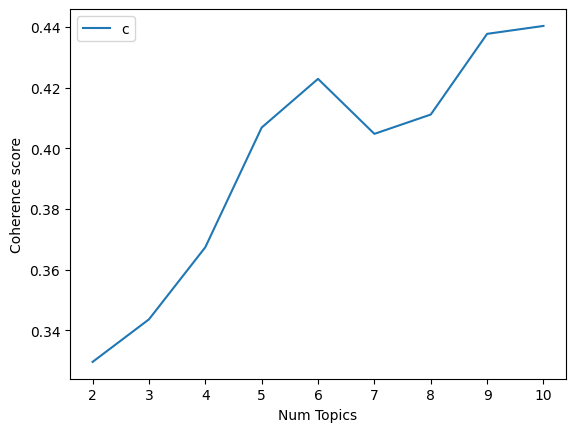

In [ ]:
import matplotlib.pyplot as plt  # Tambahkan baris ini

# Show graph
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores and optimal num_topics
optimal_num_topics = x[np.argmax(coherence_values)]
print(f"Optimal Number of Topics: {optimal_num_topics}")

Optimal Number of Topics: 10


In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 1))

Num Topics = 2  has Coherence Value of 0.3
Num Topics = 3  has Coherence Value of 0.3
Num Topics = 4  has Coherence Value of 0.4
Num Topics = 5  has Coherence Value of 0.4
Num Topics = 6  has Coherence Value of 0.4
Num Topics = 7  has Coherence Value of 0.4
Num Topics = 8  has Coherence Value of 0.4
Num Topics = 9  has Coherence Value of 0.4
Num Topics = 10  has Coherence Value of 0.4


In [ ]:
# Word Count of Topic Keywords (menghitung frekuensi kemunculan kata-kata kunci dari setiap topik dalam model LDA)

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in df['bigram_trigram'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

            word  topic_id  importance  word_count
0      bea_cukai         0    0.095978        3497
1         kritik         0    0.050401         162
2     masyarakat         0    0.043416         304
3        kinerja         0    0.036752         114
4     pemerintah         0    0.035759         146
5         aturan         0    0.027871         240
6         publik         0    0.025593         132
7          bikin         0    0.022510         210
8        lembaga         0    0.019579         108
9       kegiatan         0    0.019428          74
10     bea_cukai         1    0.050943        3497
11        barang         1    0.035099        1212
12           bea         1    0.016237         551
13  turun_tangan         1    0.014852          74
14         impor         1    0.014340         272
15         ramai         1    0.013920          38
16     indonesia         1    0.013088         672
17         teman         1    0.010480         162
18         pajak         1    0

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Init output

    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                # Append row as dictionary (faster)
                sent_topics_df = pd.concat([sent_topics_df,
                                            pd.DataFrame({'Dominant_Topic': [int(topic_num+1)],
                                                          'Perc_Contribution': [round(prop_topic, 4)],
                                                          'Topic_Keywords': [topic_keywords]})],
                                           ignore_index=True)
            else:
                break

    # Add original text to the end of the output
    sent_topics_df = pd.concat([sent_topics_df, pd.Series(texts)], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']
    return sent_topics_df


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=df['bigram_trigram'])

# Format DataFrame
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               4              0.7575   
1            1               2              0.5866   
2            2               3              0.9758   
3            3               1              0.9530   
4            4               3              0.5557   
5            5               3              0.8871   
6            6               2              0.7618   
7            7               2              0.8913   
8            8               1              0.9530   
9            9               3              0.6443   

                                            Keywords  \
0  kritik, bea_cukai, sri_mulyani, terima_kasih, ...   
1  bea_cukai, barang, bea, turun_tangan, impor, r...   
2  saran, layanan, bea_cukai, terkait, pejabat, l...   
3  bea_cukai, kritik, masyarakat, kinerja, pemeri...   
4  saran, layanan, bea_cukai, terkait, pejabat, l...   
5  saran, layanan, bea_cukai, terkait, pejabat, l...   
6  bea_cukai,

In [ ]:
# Simpan DataFrame ke dalam file Excel
df_dominant_topic.to_excel('dominant_topics.xlsx', index=False)

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
#simpan ke google drive
df_imp_wcount.to_csv('df_imp_wcount.csv')
!cp df_imp_wcount.csv "drive/My Drive/Colab Notebooks/"

In [ ]:
#simpan ke google drive
df_dominant_topic.to_csv('df_dominant_topic.csv')
!cp df_dominant_topic.csv "drive/My Drive/Colab Notebooks/"

In [ ]:
pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.7 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [ ]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = [dictionary.doc2bow(text) for text in df['bigram_trigram']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# proses ini mungkin agak lama
if 1 == 1:
   LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
   with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_prepared_3'+ str(num_topics) +'.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.192678  0.153854       1        1  18.791470
1      0.197235 -0.254955       2        1  41.672217
2      0.255260  0.206178       3        1  25.460646
3     -0.259818 -0.105078       4        1  14.075667, topic_info=                 Term         Freq        Total Category  logprob  loglift
3087           kritik  2924.000000  2924.000000  Default  30.0000  30.0000
2           bea_cukai  6437.000000  6437.000000  Default  29.0000  29.0000
253       sri_mulyani   912.000000   912.000000  Default  28.0000  28.0000
846             saran  1238.000000  1238.000000  Default  27.0000  27.0000
495        masyarakat   793.000000   793.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1038  pajak_bea_cukai   157.444775   318.463926   Topic4  -4.4625   1.2563
269             pajak   163.421604   848.187659   Topic4  -4.4252   0.3140
805              kena   133.589431   342.621080   Topic4  -4.6268   1.0189
42             negara   138.766513   575.515585   Topic4  -4.5888   0.5382
2175            keras   127.519044   347.409678   Topic4  -4.6733   0.9585

[218 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2811      1  0.998697      acak
121       3  0.992121      akal
3791      4  0.997305      alam
173       2  0.213611      anak
173       3  0.046890      anak
...     ...       ...       ...
260       3  0.629876     viral
260       4  0.059558     viral
4500      1  1.000434     wakil
3017      1  0.998275  warganet
527       4  0.990726   wilayah

[233 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


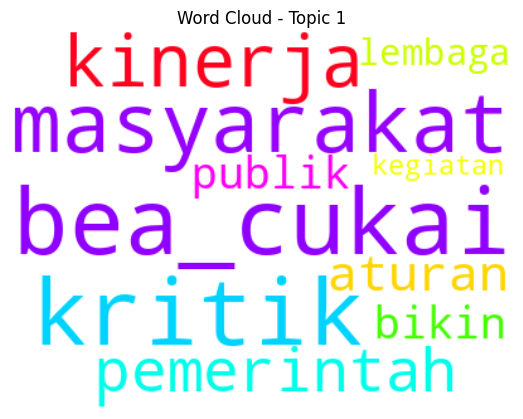

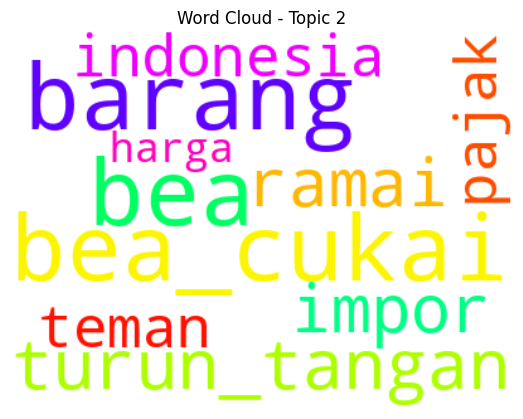

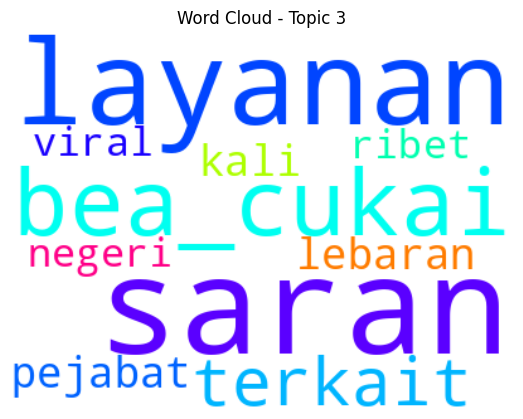

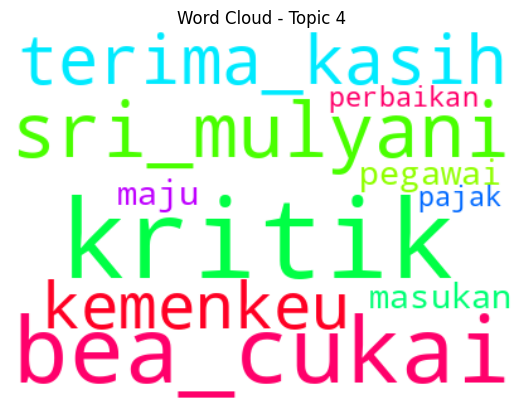

In [ ]:
from gensim.models import LdaModel
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Dictionary and Corpus
dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = corpora.MmCorpus('corpus.mm')

# Initialize and train LDA model
num_topics = 4  # Jumlah topik
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)

# Membuat word cloud untuk setiap topik
for topic_id, topic_words in lda_model.print_topics():
    # Mengambil kata-kata utama dalam topik
    words = topic_words.split("+")
    words = [word.split("*")[1].replace('"', '').strip() for word in words]

    # Menggabungkan semua kata menjadi satu string
    text = ' '.join(words)

    # Membuat word cloud
    wordcloud = WordCloud(width=400, height=300,
                          background_color='white',
                          stopwords=None,
                          min_font_size=5,
                          colormap='hsv').generate(text)

    # Menampilkan word cloud
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud - Topic {topic_id+1}")
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Menyimpan word cloud
    plt.savefig(f"wordcloud_topic_{topic_id+1}.png", bbox_inches='tight', dpi=300)

    plt.show()





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


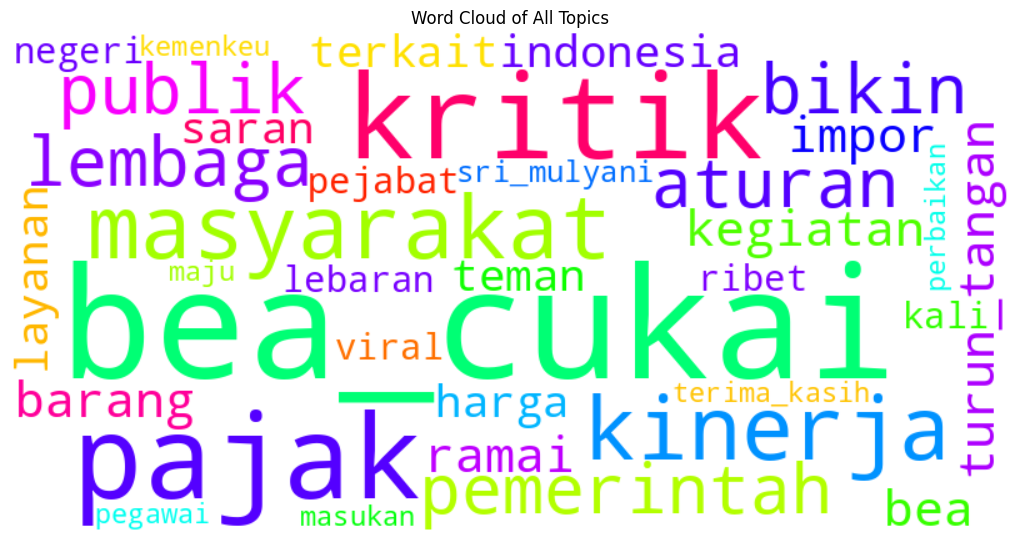

In [ ]:
from gensim.models import LdaModel
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Dictionary and Corpus
dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = corpora.MmCorpus('corpus.mm')

# Initialize and train LDA model
num_topics = 4  # Jumlah topik
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha=0.1, eta=0.001, random_state=100)

# Menggabungkan semua kata dari semua topik menjadi satu string
all_topics_words = ' '.join([word for _, topic_words in lda_model.print_topics() for word in topic_words.split('+')])

# Membuat word cloud dari semua kata
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='hsv').generate(all_topics_words)

# Menampilkan word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of All Topics")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()
